In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv('churn.csv')
df.drop('customer_id', axis=1, inplace=True)
df.head()

,age,state,account_type,monthly_income_bracket,avg_monthly_balance,num_transactions_month,mobile_app_logins,customer_support_calls,preferred_channel,tenure_months,credit_score,churn
0,49,FCT,Current,>600k,78219.39,24,18,1,USSD,23,605.0,0
1,34,Akwa Ibom,Savings,50k-150k,253689.10,24,29,0,Mobile App,99,548.0,0
2,35,Lagos,Business,150k-300k,78805.97,31,22,3,Mobile App,21,618.0,0
3,21,Kaduna,Current,<50k,89117.77,21,13,1,Branch,106,697.0,0
4,52,Niger,Savings,<50k,159499.82,18,18,1,Branch,68,539.0,0


- EDA

In [4]:
df.shape

(20000, 12)

In [5]:
df.isna().sum(

    
)

age                       0
state                     0
account_type              0
monthly_income_bracket    0
avg_monthly_balance       0
num_transactions_month    0
mobile_app_logins         0
customer_support_calls    0
preferred_channel         0
tenure_months             0
credit_score              0
churn                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,age,avg_monthly_balance,num_transactions_month,mobile_app_logins,customer_support_calls,tenure_months,credit_score,churn
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,43.524100,1.992193e+05,24.986500,18.027350,1.20600,59.854000,560.553350,0.148200
std,15.020063,1.974538e+05,5.027861,4.280843,1.10092,34.387585,89.950842,0.355307
min,18.000000,5.510000e+00,8.000000,4.000000,0.00000,1.000000,300.000000,0.000000
25%,30.750000,5.701266e+04,22.000000,15.000000,0.00000,30.000000,500.000000,0.000000
50%,44.000000,1.391648e+05,25.000000,18.000000,1.00000,59.000000,561.000000,0.000000
75%,57.000000,2.776428e+05,28.000000,21.000000,2.00000,90.000000,621.000000,0.000000
max,69.000000,2.127277e+06,50.000000,41.000000,7.00000,119.000000,850.000000,1.000000


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
for cat_col in cat_cols:
    print(f"Value counts for {cat_col}:")
    print(df[cat_col].value_counts())
    print("\n")

Value counts for state:
state
Kebbi          585
Zamfara        580
Kano           578
Nasarawa       572
Adamawa        568
Rivers         567
Kogi           564
Bauchi         560
Ondo           559
Kaduna         558
Oyo            557
Cross River    551
Jigawa         550
Imo            549
Katsina        547
Kwara          542
Akwa Ibom      542
Enugu          541
Sokoto         534
Lagos          534
Gombe          532
Anambra        531
Delta          527
Niger          527
Ogun           525
Taraba         524
FCT            524
Abia           523
Yobe           523
Ebonyi         523
Bayelsa        521
Edo            521
Osun           519
Benue          518
Plateau        515
Ekiti          514
Borno          495
Name: count, dtype: int64


Value counts for account_type:
account_type
Savings     11015
Current      7070
Business     1915
Name: count, dtype: int64


Value counts for monthly_income_bracket:
monthly_income_bracket
50k-150k     6900
<50k         5083
150k-300k    

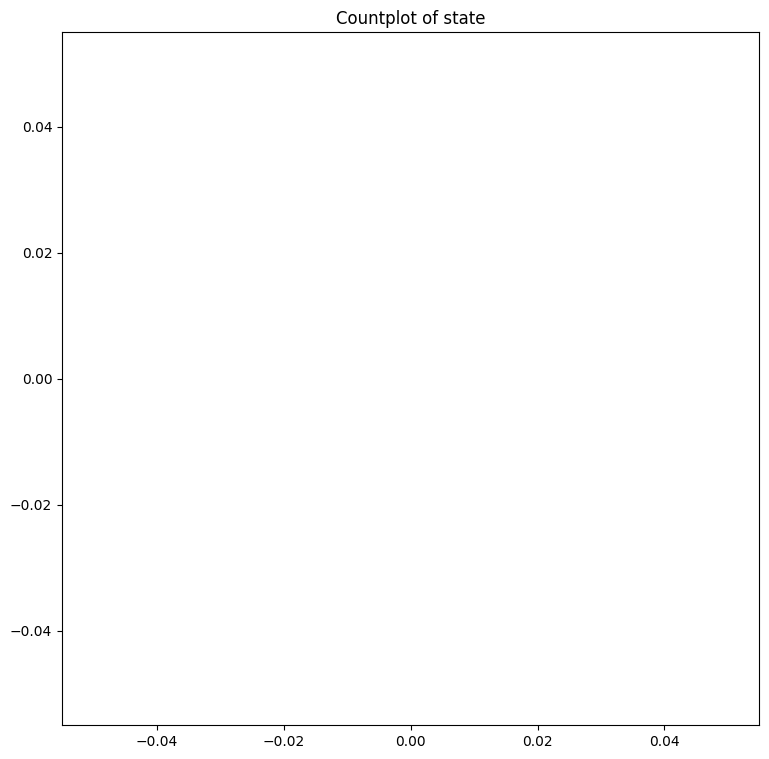

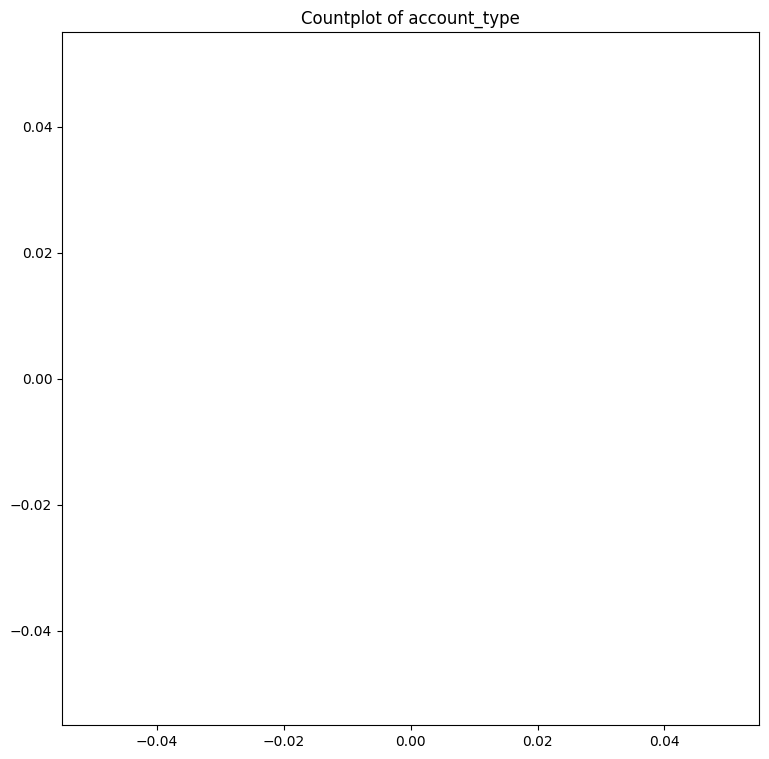

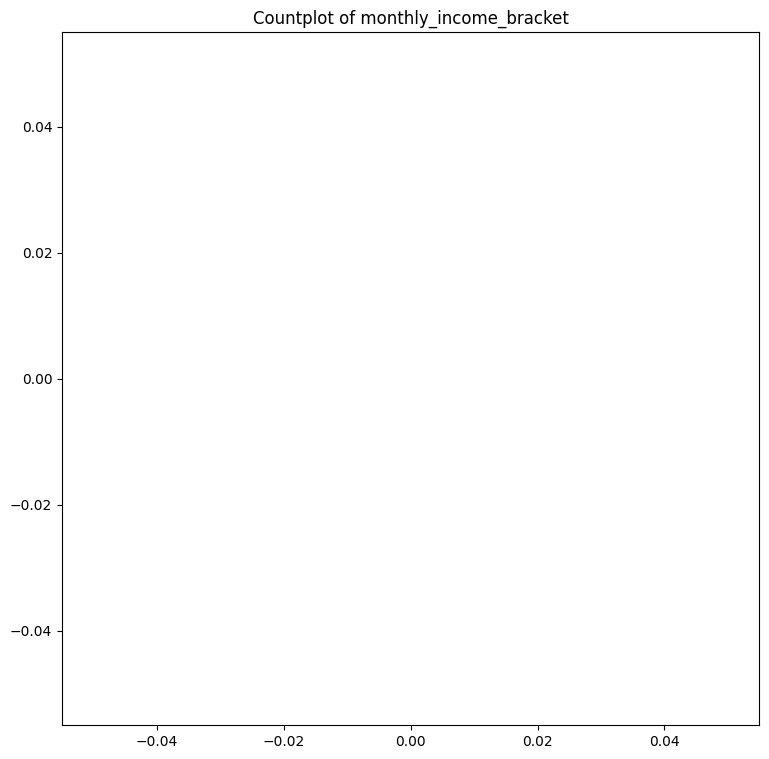

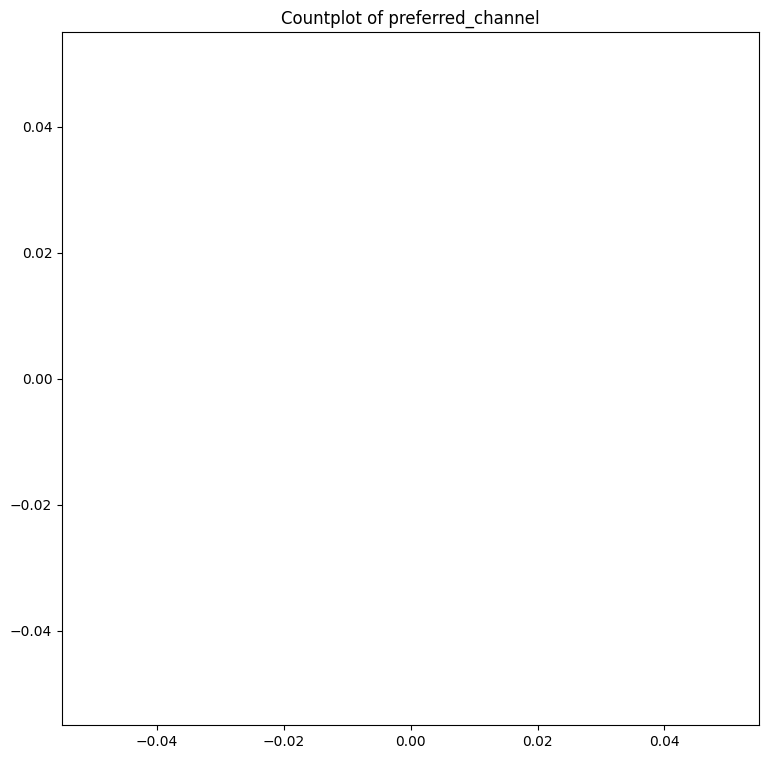

In [9]:
for cats in cat_cols:
    plt.figure(figsize=(9,9))
    plt.plot(data=df, color='black', orient='v')
    plt.title(f'Countplot of {cats}')
    plt.show()

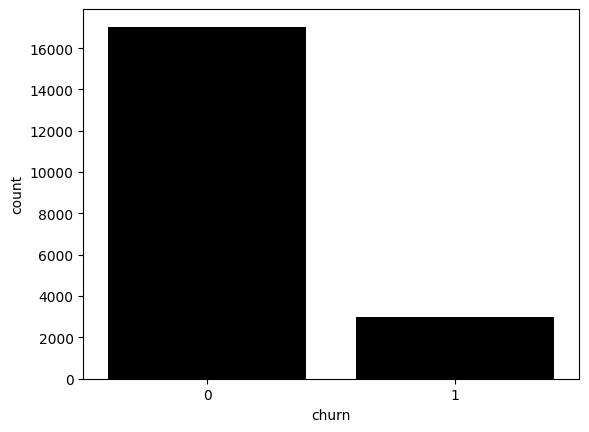

In [10]:
sns.countplot(x='churn', data=df, color='black')
plt.show()

<h3> Preprocessing <h3>

- Encoding

In [11]:
df_1 = df[df['churn'] == 1]
df_0 = df[df['churn'] == 0]

In [12]:
count_0, count_1 = df.churn.value_counts()
df_1_over = df_1.sample(count_0, replace=True)

df_bal = pd.concat([df_0, df_1_over], axis=0)
df_bal

,age,state,account_type,monthly_income_bracket,avg_monthly_balance,num_transactions_month,mobile_app_logins,customer_support_calls,preferred_channel,tenure_months,credit_score,churn
0,49,FCT,Current,>600k,78219.39,24,18,1,USSD,23,605.0,0
1,34,Akwa Ibom,Savings,50k-150k,253689.10,24,29,0,Mobile App,99,548.0,0
2,35,Lagos,Business,150k-300k,78805.97,31,22,3,Mobile App,21,618.0,0
3,21,Kaduna,Current,<50k,89117.77,21,13,1,Branch,106,697.0,0
4,52,Niger,Savings,<50k,159499.82,18,18,1,Branch,68,539.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3601,57,FCT,Current,<50k,335406.83,21,16,0,USSD,14,495.0,1
3615,27,Ogun,Savings,300k-600k,29270.56,22,14,1,Mobile App,25,626.0,1
10956,28,Oyo,Current,150k-300k,33593.94,25,12,1,USSD,15,366.0,1
15599,25,Ekiti,Current,150k-300k,82052.00,36,20,0,USSD,45,424.0,1


In [13]:
x = df_bal.drop('churn', axis=1)
y = df_bal.churn 

In [14]:
print(x.columns)

Index(['age', 'state', 'account_type', 'monthly_income_bracket',
       'avg_monthly_balance', 'num_transactions_month', 'mobile_app_logins',
       'customer_support_calls', 'preferred_channel', 'tenure_months',
       'credit_score'],
      dtype='object')


- Model Training














In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
cat_cols = ['state', 'account_type', 'monthly_income_bracket', 'preferred_channel']
encoder = {}
print("Encoding categorical columns...")
for col in cat_cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col].astype(str))
    x_test[col] = x_test[col].astype(str).map(
        lambda s: le.transform([s])[0] if s in le.classes_ else 0
    )
    
    if 'Unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'Unknown')
    
    encoder[col] = le
    print(f"   {col}: {len(le.classes_)} classes")

Encoding categorical columns...
   state: 38 classes
   account_type: 4 classes
   monthly_income_bracket: 6 classes
   preferred_channel: 5 classes


In [17]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model2 = XGBClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
model4 = DecisionTreeClassifier(random_state=42)
model5 = LGBMClassifier(n_estimators=300, random_state=42, n_jobs=-1)

- Model Traning

In [19]:
mods = [model, model2, model3, model4, model5]
for models in mods:
    models.fit(x_train_scaled, y_train)
    print(f'{models} Trained Successfully')

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42) Trained Successfully
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...) Trained Successfully


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42) Trained Successfully
DecisionTreeClassifier(random_state=42) Trained Successfully
[LightGBM] [Info] Number of positive: 13677, number of negative: 13580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 27257, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501779 -> initscore=0.007117
[LightGBM] [Info] Start training from score 0.007117
LGBMClassifier(n_estimators=300, n_jobs=-1, random_state=42) Trained Successfully


- Model Evaluation

In [20]:
def eval(models):
    y_preds = models.predict(x_test_scaled)
    print(f'Report for {models}', classification_report(y_test, y_preds))

for models in mods:
    eval(models)

Report for RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)               precision    recall  f1-score   support

           0       0.99      0.91      0.95      3456
           1       0.91      0.99      0.95      3359

    accuracy                           0.95      6815
   macro avg       0.95      0.95      0.95      6815
weighted avg       0.95      0.95      0.95      6815

Report for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Report for LGBMClassifier(n_estimators=300, n_jobs=-1, random_state=42)               precision    recall  f1-score   support

           0       0.99      0.78      0.88      3456
           1       0.82      0.99      0.90      3359

    accuracy                           0.89      6815
   macro avg       0.90      0.89      0.89      6815
weighted avg       0.91      0.89      0.89      6815



In [24]:
for models in mods:
    print(f"Evaluation Metrics for {models}:")
    y_preds = models.predict(x_test_scaled)
    print(f'Accuracy: {accuracy_score(y_test, y_preds).__round__(2)}')
    print(f'Precision: {precision_score(y_test, y_preds).__round__(2)}')
    print(f'Recall: {recall_score(y_test, y_preds).__round__(2)}')
    print(f'F1 Score: {f1_score(y_test, y_preds).__round__(2)}')

Evaluation Metrics for RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42):
Accuracy: 0.95
Precision: 0.91
Recall: 0.99
F1 Score: 0.95
Evaluation Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...):
Accuracy: 0.93
Precision: 0.88
Recall: 0.99
F1 Score: 0.93
Evaluat

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.89
Precision: 0.82
Recall: 0.99
F1 Score: 0.9


- Save best model

In [22]:
# joblib.dump(model, 'financial_churn_modell.pkl')
# joblib.dump(encoder, 'encoderr.pkl')
# joblib.dump(scaler, 'scalerr.pkl')

- Feaature Importance

C:\Users\Hp\AppData\Local\Temp\ipykernel_12032\2042838378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette='viridis')


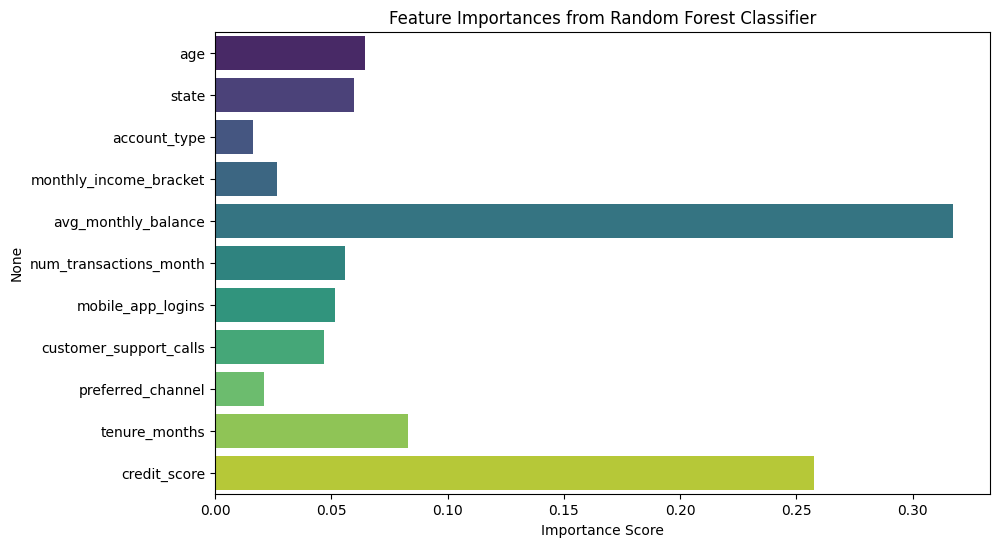

In [23]:
importances = model.feature_importances_
feat_names = x.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feat_names, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.show()